## Assignment 6
### PH22C047
### Shyam Sunder
## Boundary Value Problem

In this notebook we will be solving boundary value problem. Our problem will be 
to find the electric potential $\phi$ inside a sphere of radius $R$ with a constant charge density $\rho_o$. This sphere will obey the __Poission Equation_

![sphere](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3J9YPnR-e9QfGJXOMIRHJmHs5O1ZpjZOvag&usqp=CAU)

$$\nabla^2\phi=-\frac{\rho_o}{\epsilon_0}$$

In our case, the charge density $\rho$ is independent of angles, so the potential has a spherical symmetry. Thus our $\phi$ will only depend of $r$ and hence we can write the above equation as: 
$$\frac{1}{r^2} \frac{d}{dr}\left( r^2 \frac{d}{dr} \phi(r)\right) = - \frac{\rho_0}{\epsilon_0}$$

Which can be further simplified into 

$$\frac{d^2 \phi}{dr^2} +  \frac{2}{r} \frac{d\phi}{dr} = - \frac{\rho_0}{\epsilon_0}$$

Now for boundary conditions: at the surface of the Sphere, the potential will look like that it's all potential is concentrated at its center. so we can calculate total charge that would be $q = 4\pi r^3/3$ so the potential at the surface would be 
$$\phi(R) = \frac{\rho R^2}{3 \epsilon_0}$$

Next boundary condition would be very easy. Because of the spherical symmetry the electric field would be zero at the center of the sphere: 
$$\frac{d\phi}{d r}\rvert_{r=0} = 0$$ 


Now we need to non-dimenssionalise our equation. The lenght scale in your problem is the radius of the sphere $R$. So we define dimessionless length $\mathcal{r} \to \frac{r}{R}$ .Our potential scale would be as $\phi_0 = \frac{\rho_0 R^2}{\epsilon_0}$ so dimessionless potential would be: $\phi \to \frac{\phi}{\phi_0}$. From this our dimessionless equation would be:

$$\frac{d^2 \phi}{dr^2} +  \frac{2}{r} \frac{d\phi}{dr} = -1$$

With the boundary conditions $E(0) = 0$ and $\phi(1) = 1/3$. And our reigon of interest would be inside the sphere that is $[0,1]$.

To solve this equation, we will use finite difference method. We will devide the interval [0,1] into $N$ small spaces. Eeach space will have the length $h$. If we write the potenial $\phi(r_i) = \phi_i$ We can write the derrivatives as following:

$$\frac{d\phi}{dr} = \frac{\phi_{i+1}-\phi_{i-1}}{2h} , \frac{d^2 \phi}{dr^2} = \frac{\phi_{i+1}+\phi_{i-1}-2\phi_i}{h^2}$$

So our diffrential equation becomes:

$$\frac{\phi_{i+1}+\phi_{i-1}-2\phi_i}{h^2} + \frac{1}{r}\frac{\phi_{i+1}-\phi_{i-1}}{2h} =-1$$

or

$$\phi_{i+1} \left( \frac{1}{h^2}+\frac{1}{h r_i} \right)  + \phi_{i-1} \left( \frac{1}{h^2}-\frac{1}{h r_i} \right ) + \phi_{i} \left( \frac{-2}{h^2}\right) = -1 $$

with boundary conditions $\frac{\phi_1 - \phi_0}{h} = 0$ and $\phi_N = 1/3$.

Now unfortunately we don't have the mathematica function `NDsolve` in python. So I solved this diffrential equation on paper to compare the solution. The real solution of the problem is:

$$\phi(r) = -\frac{r^2}{6} + \frac{1}{2}, \{0 \le r \le 1 \}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_6779/1334896370.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
delta = lambda i,j: 1 if i==j else 0 #defining dirac delta function 
delta(1,0)

0

In [3]:
a = 0
b = 1
N = 100 #number of points in the grid
h = (b-a)/N #grid spacing

rs = np.linspace(0,1,N)
mat = np.zeros((N,N)) #sparse matrix

In [4]:
for i in range(1,N):
    for j in range(N):
        mat[i,j] = (1/h**2 + 1/(h*rs[i]))*delta(i+1,j) + (1/h**2 - 1/(h*rs[i]))*delta(i-1,j) - (2/h**2)*delta(i,j)

In [5]:
#putting the boundary conditions
mat[0,0] = -1/h
mat[0,1] = 1/h
mat[-1,-1] = 1
mat[-1,-2] = 0

In [6]:
#the cofficient matrix
coff = -1*np.ones(N)

#putting boundary conditions in coff mat
coff[0] = 0
coff[-1] = 1/3

In [7]:
#the moment of solution
phis = np.linalg.inv(mat)@coff

In [8]:
def phi_th(r):
    return -r**2/6 + 1/2

Text(0, 0.5, '$\\phi(r)$')

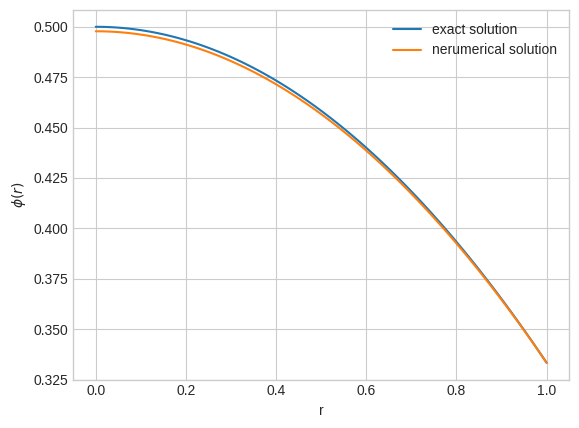

In [9]:
plt.plot(rs, phi_th(rs), label='exact solution')
plt.plot(rs, phis, label='nerumerical solution')
plt.legend();
plt.xlabel('r')
plt.ylabel(r'$\phi(r)$')

In [10]:
phi_real = phi_th(rs) #real values
error_local = phi_real - phis
error_local = phi_real - phis
error_global = np.dot(error_local, error_local)
order = np.log(error_global)/np.log(h)
print(order)

1.7901483899798414


The error is of the order of $h^2$